<p style="color: red;">永远不要怀疑自己，快乐地完成工作，快乐地生活</p>
<p style="color: red;">永远不要怀疑自己，快乐地完成工作，快乐地生活</p>
<p style="color: red;">永远不要怀疑自己，快乐地完成工作，快乐地生活</p>

<h1>K-th smallest element in binary search tree</h1>

In [ ]:
class Solution:
    def kthSmallest(self, root: Optional[TreeNode], k: int) -> int:
        inorder = []
        def dfs(node):
            if node:
                if node.left:
                    inorder.extend(dfs(node.left))
                inorder.append(node.val)
                if node.right:
                    inorder.extend(dfs(node.right))
            return inorder
        dfs(root)
        return inorder[k - 1]


错误的，当k:3，root:[5,3,6,2,4,null,null,1]。inorder是[1,1,2,1,1,2,3,4,1,1,2,1,1,2,3,4,1,1,2,1,1,2,3,4,1,1,2,1,1,2,3,4,5,6,1,1,2,1,1,2,3,4,1,1,2,1,1,2,3,4,1,1,2,1,1,2,3,4,1,1,2,1,1,2,3,4,5,6]，不能extend而要return

In [ ]:
class Solution:
    def kthSmallest(self, root, k):
        def inorder(r):
            return inorder(r.left) + [r.val] + inorder(r.right) if r else []
    
        return inorder(root)[k - 1]

In [ ]:
extend不能recursion而return可以，因为return给了函数一个激励，然后调用recursion栈

<h1>convert sorted array to binary search tree</h1>

能想到recursion，recursion的结构是什么呢？这就像模板一样要记住，我要往tree node上append新Node,所以node肯定不能被作为参数传入recursion函数里，只传入left,right就可以了。每个recursion要返回什么呢也要思考，其实可以从最高层想，所以结构为root= , root.left= , root.right= .
注意终止条件的确立，可以return None

In [ ]:
class Solution:
    def sortedArrayToBST(self, nums: List[int]) -> TreeNode:        
        def helper(left, right):
            if left > right:
                return None

            # always choose left middle node as a root
            p = (left + right) // 2

            # preorder traversal: node -> left -> right
            root = TreeNode(nums[p])
            root.left = helper(left, p - 1)
            root.right = helper(p + 1, right)
            return root
        
        return helper(0, len(nums) - 1)

<h1>1. inorder traversal</h1>

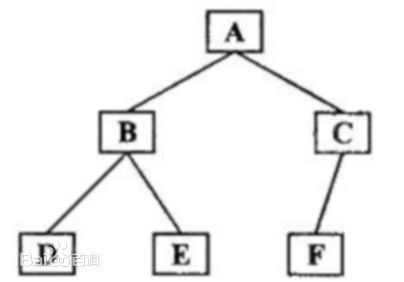

In [4]:
from IPython.display import Image
Image(filename="InorderTraverse.jpg",height=200,width=200)
# 左中右 DBEAFC

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        res = []
        if root:
            res = self.inorderTraversal(root.left)            # B (append +), D (append +), [],[D],[D,B,E],[DBEA],DBEAFC
            res.append(root.val)
            res = res + self.inorderTraversal(root.right)
        return res

<h1>2. validate binary search tree</h1>

<h2>Approach 1: Recursive Traversal with Valid Range</h2>

如何验证一个树是二叉搜索树，注意，树全都是recursive的结构，起始于root，root是二叉树 = root节点满足条件+左树是+右树是。分别对应代码里的第二个if 和最后一个return

In [ ]:
class Solution:
    def isValidBST(self, root: TreeNode) -> bool:

        def validate(node, low=-math.inf, high=math.inf)
            # Empty trees are valid BSTs.
            if not node:
                return True
            # The current node's value must be between low and high.
            if node.val <= low or node.val >= high:
                return False

            # The left and right subtree must also be valid.
            return (validate(node.right, node.val, high) and
                   validate(node.left, low, node.val))

        return validate(root)

<h2>Approach 2: Iterative Traversal with Valid Range</h2>

In [ ]:
class Solution:
    def isValidBST(self, root: TreeNode) -> bool:
        if not root:
            return True

        stack = [(root, -math.inf, math.inf)]
        while stack:
            root, lower, upper = stack.pop()
            if not root:
                continue
            val = root.val
            if val <= lower or val >= upper: #root不满足
                return False
            #如果满足则：
            stack.append((root.right, val, upper))
            stack.append((root.left, lower, val))
        return True

<h2>Approach 3: Recursive Inorder Traversal</h2>

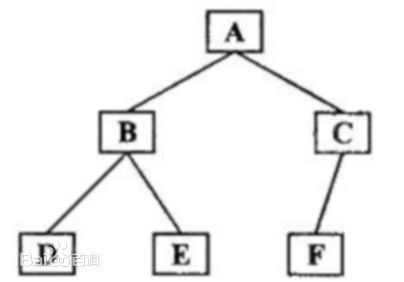

In [1]:
from IPython.display import Image
Image(filename="InorderTraverse.jpg",height=200,width=200)
# 左中右 DBEAFC

In [ ]:
class Solution:
    def isValidBST(self, root: TreeNode) -> bool:
        #注意：self.prev是对于里层函数来讲，是全局变量
        def inorder(root):               #B
            if not root:
                return True
            if not inorder(root.left):   #if left false, then false，recusion up to D，self.prev=D
                return False             # not return False
            if root.val <= self.prev:    #B<D? no
                return False             #return True
            #如果满足则：
            self.prev = root.val         # self.prev = B
            return inorder(root.right)   #inorder(E)

        self.prev = -math.inf
        return inorder(root)

<h1>3. symmetric tree</h1>

In [ ]:
#
class Solution:
    def isTreeSymmetric(self, leftRoot, rightRoot):
        if leftRoot is None and rightRoot is None: #a leaf node is symmetric
            return True
        if (leftRoot is None and rightRoot is not None) or (leftRoot is not None and rightRoot is None):
            return False
        if leftRoot.val != rightRoot.val:
            return False
        return self.isTreeSymmetric(leftRoot.left, rightRoot.right) and self.isTreeSymmetric(leftRoot.right, rightRoot.left)
    def isSymmetric(self, root: Optional[TreeNode]) -> bool:
        return self.isTreeSymmetric(root.left, root.right)

<p>recusive solve, meet ending condition and then return, the first false will be returned</p>

<h1>4. level-order traversal</h1>

一个level一个列表

<p>BFS+iterative approach</p>

In [ ]:
class solution:
    def levelorder(self, root:Optional[TreeNode]) -> List[List[int]]:
        if not root:
            return None
        queue=[root]
        res=[]
        
        while queue:
            level=[]
            l=len(queue)
            for i in range(l):
                currNode=queue.pop(0)
                level.append(currNode.val)
                if currNode.left:
                    queue.append(currNode.left)
                if currNode.right:
                    queue.append(currNode.right)
            res.append(level)
        return res     

<p>DFS solution 不太熟悉</p>

In [ ]:
class solution:
    def levelorder(self, root:Optional[TreeNode]) -> List[List[int]]:
        res=[]
        
        def dfs(node,level):
            if not node:
                return 
            if len(res)<level+1:
                res.append([])
            
            #0,1,2,3对应着层，也是索引
            res[level].append(node.val)
            dfs(node.left, level+1)
            dfs(node.right, level+1)
        
        dfs(root,0)
        
        return res  

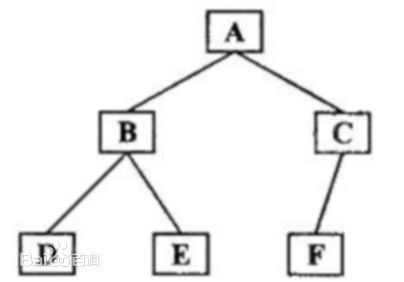

In [5]:
from IPython.display import Image
Image(filename="InorderTraverse.jpg",height=200,width=200)

<h1>5. Maximum Depth of Binary Tree</h1>

In [ ]:
#use BFS 自己写的
#只要BFS就是tree
class Solution:
    def maxDepth(self, root: Optional[TreeNode]) -> int:
        if root:
            depth=1
        else:
            return 0
        queue=[root]
        while queue:
            for i in range(len(queue)):
                curNode=queue.pop(0)
                if curNode.left:
                    queue.append(curNode.left)
                if curNode.right:
                    queue.append(curNode.right)
            depth+=1
        return depth-1

In [ ]:
#recursion + DFS
#recursion本质是调用自身，找到能化解成什么子问题：从root计算的maxdepth=max(从left or right计算的maxdepth)+1
class Solution:
    def maxDepth(self, root: Optional[TreeNode]) -> int:
        if not root:
            return 0
        return max(self.maxDepth(root.left), self.maxDepth(root.right)) + 1

<h1>105. Construct Binary Tree from Preorder and Inorder Traversal</h1>

<p>https://leetcode.com/problems/construct-binary-tree-from-preorder-and-inorder-traversal/solutions/1102530/construct-binary-tree-from-preorder-and-inorder-traversal/</p>

nonlocal 可以直接让内层函数返回并修改外层函数的变量

use preorder list's index 0 to find root, use inorder and this value to find the left and right tree

In [ ]:
class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> TreeNode:

        def array_to_tree(left, right):
            nonlocal preorder_index
            # if there are no elements to construct the tree
            if left > right: return None

            # select the preorder_index element as the root and increment it
            root_value = preorder[preorder_index]
            root = TreeNode(root_value)


            preorder_index += 1

            # build left and right subtree
            # excluding inorder_index_map[root_value] element because it's the root
            root.left = array_to_tree(left, inorder_index_map[root_value] - 1)
            root.right = array_to_tree(inorder_index_map[root_value] + 1, right)

            return root

        preorder_index = 0

        # build a hashmap to store value -> its index relations
        inorder_index_map = {}
        for index, value in enumerate(inorder):
            inorder_index_map[value] = index

        return array_to_tree(0, len(preorder) - 1)

<h1>114.Flatten Binary Tree to Linked List</h1>

<h2>recusion</h2>

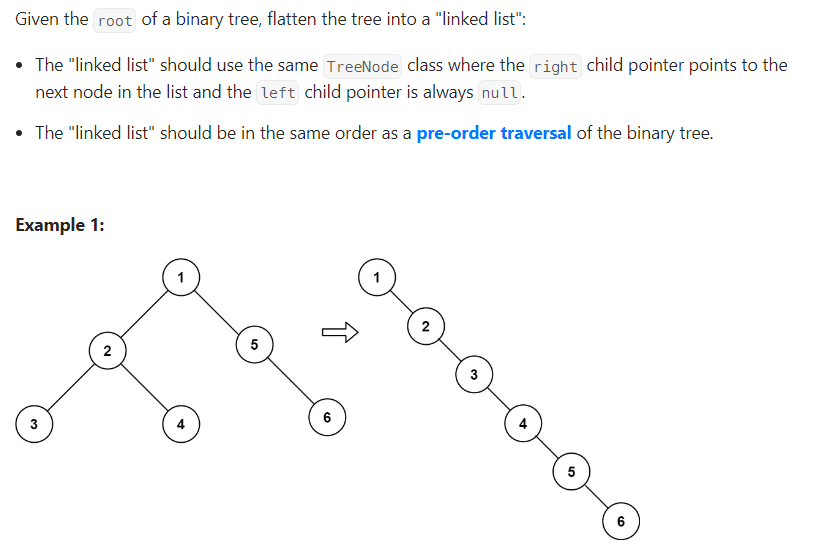

In [3]:
from IPython.display import Image
Image(filename="flatten_tree.png",height=600,width=600)

<p>when it comes to problems where the structure of the tree has to be modified or we have to traverse the tree in general, recursion is one of the top approaches</p>
<p>The main idea behind a recursive solution is that we use the solutions for subproblems to solve an uber level problem</p>
<p>假设left 和right已经通过recursion 被flatten过了，</p>

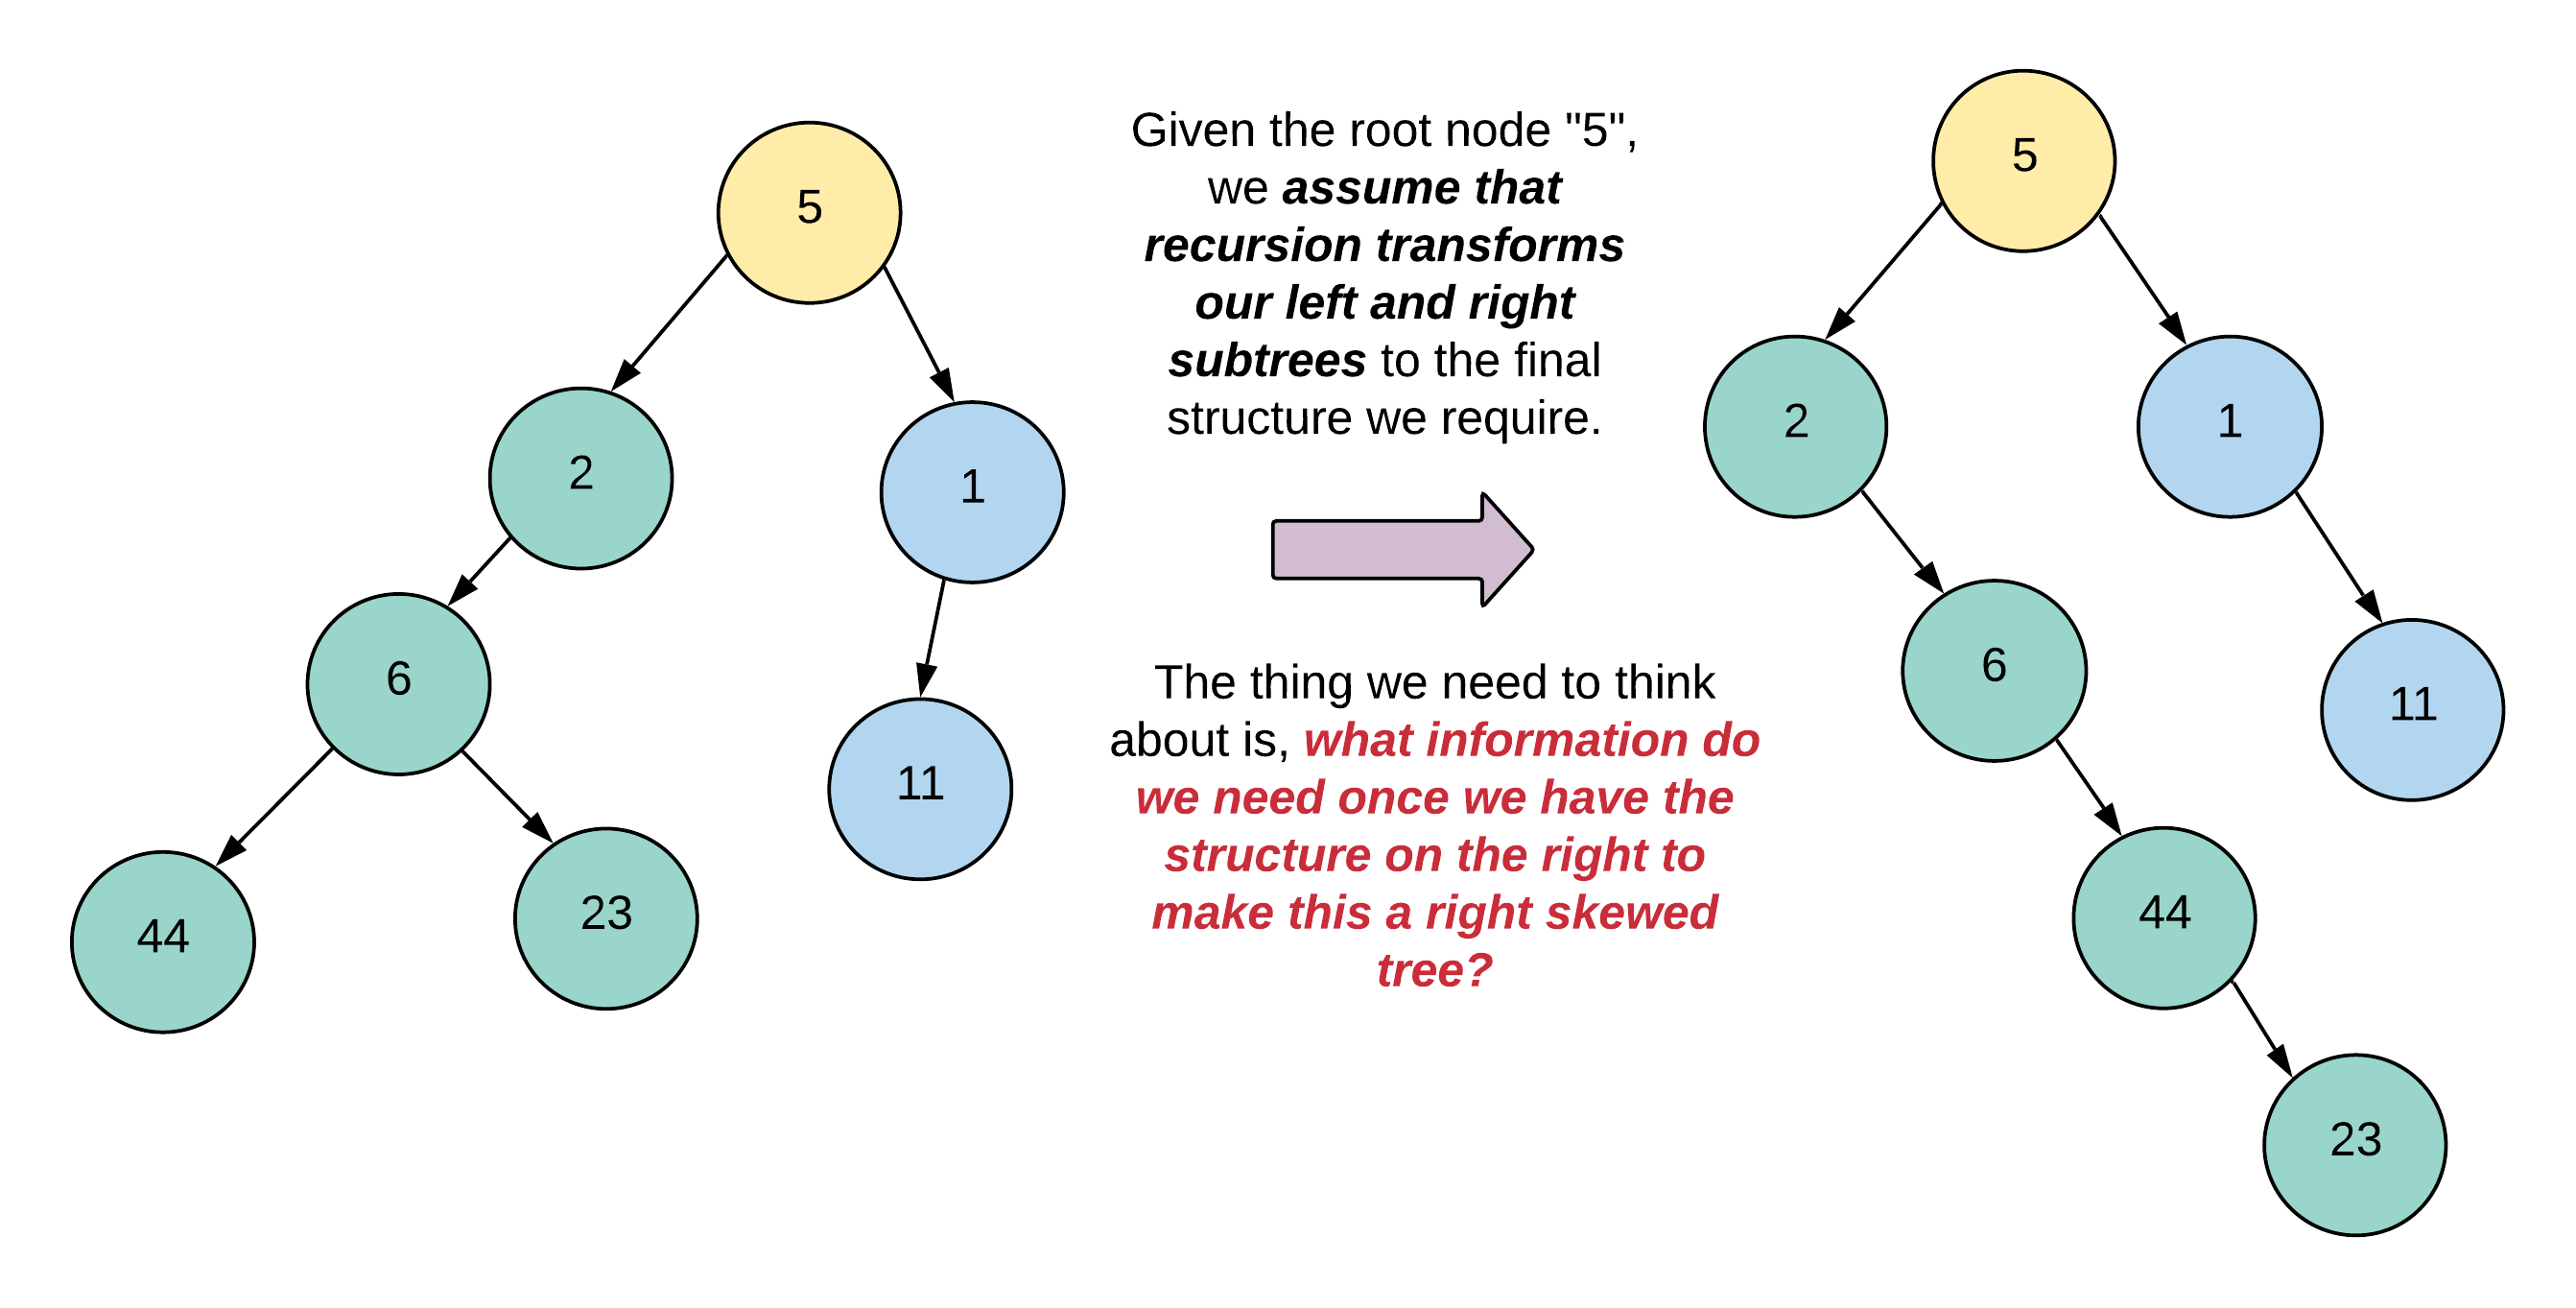

In [4]:
Image(filename="flatten1.png",height=600,width=600)

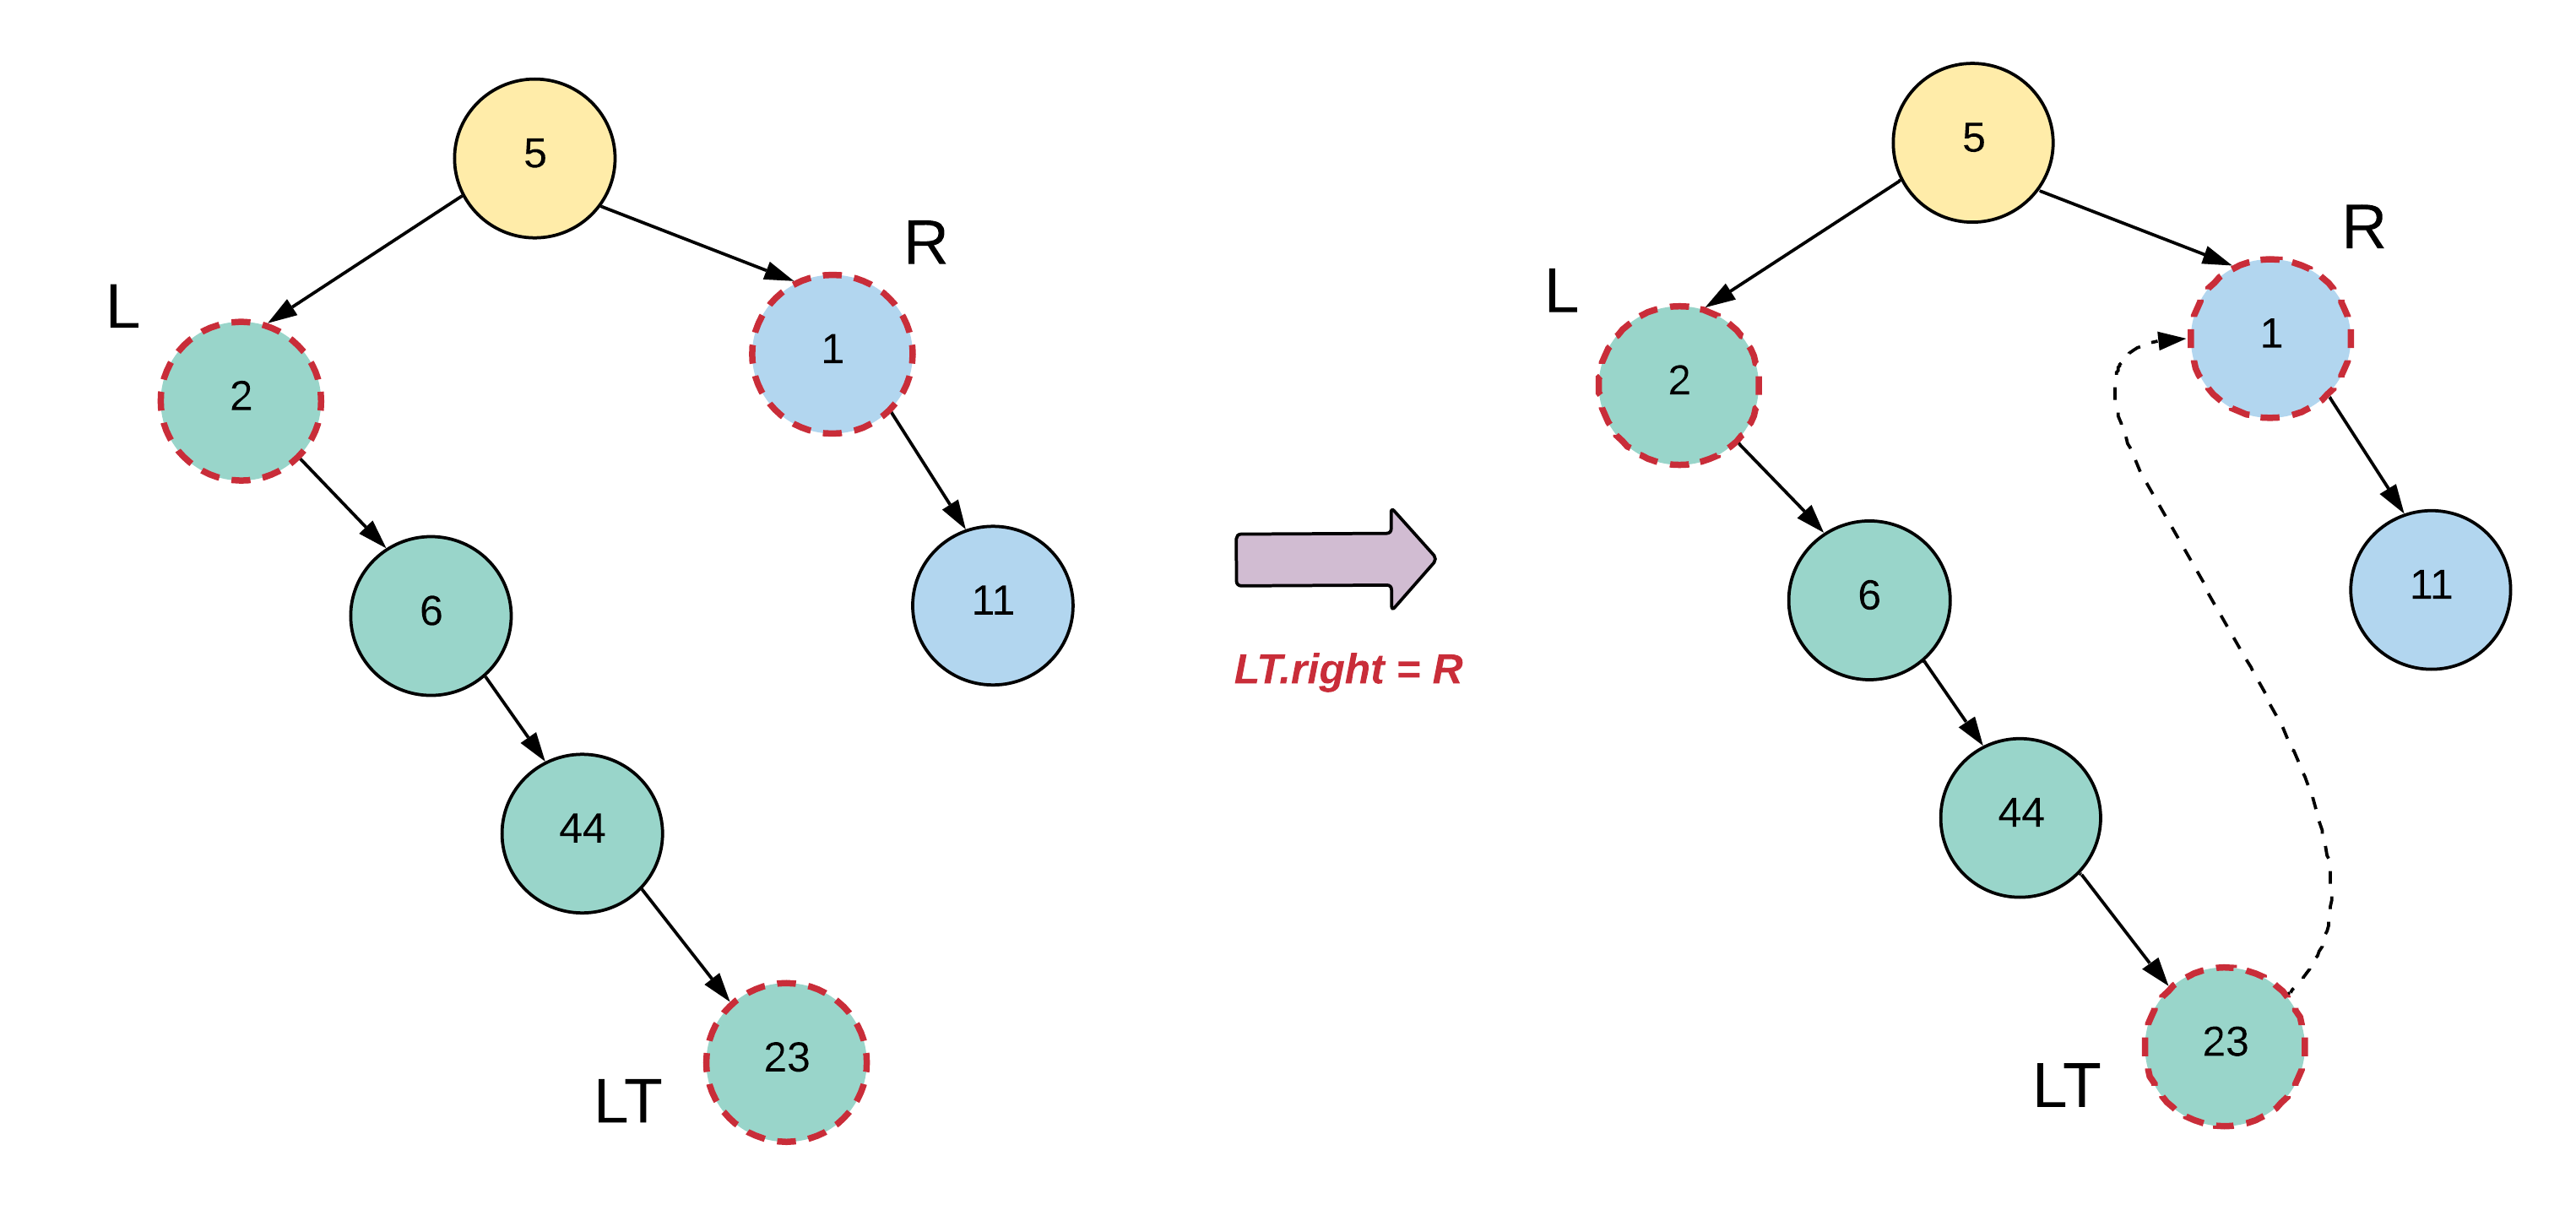

In [4]:
Image(filename="flatten2.png",height=600,width=600)

In [ ]:
class Solution:  
    def flattenTree(self, node):
        if not node:
            return None        
        # For a leaf node
        if not node.left and not node.right:
            return node
        leftTail = self.flattenTree(node.left)
        rightTail = self.flattenTree(node.right)
        if leftTail:
            #见上图和上上图
            leftTail.right = node.right
            node.right = node.left
            node.left = None
        #转换完了后RT在最后面 
        #对于根节点为2，2左连6，6右连44，23)
        #因此对于2节点，RT=None, LT=23
        #转换后变为上图结构，return 23
        return rightTail if rightTail else leftTail
    
    def flatten(self, root: TreeNode) -> None:      
        self.flattenTree(root)
        #why it does not return anything?
        #The flattenTree function does return a node, specifically the "rightmost" node of the 
        #flattened binary tree. However, this returned node is not stored in a variable, so it 
        #is not used or returned by the flatten function.

<h2>O(1) based on Morris Traversal</h2>

<p>There is a well known tree traversal out there that doesn't use any additional space at all. It's known as Morris Traversal. Recursion is all about postponing decisions until something else is completed. In order for us to be able to postpone stuff, we need to use the stack. However, in our current approach we want to get rid of the stack altogether. So, we will have to come up with a greedy way that will be costlier in terms of time, but will be space efficient in achieving the same results.</p>

For a current node, we will check if it has a left child or not. If it does, we will find the last node in the rightmost branch of the subtree rooted at this left child.

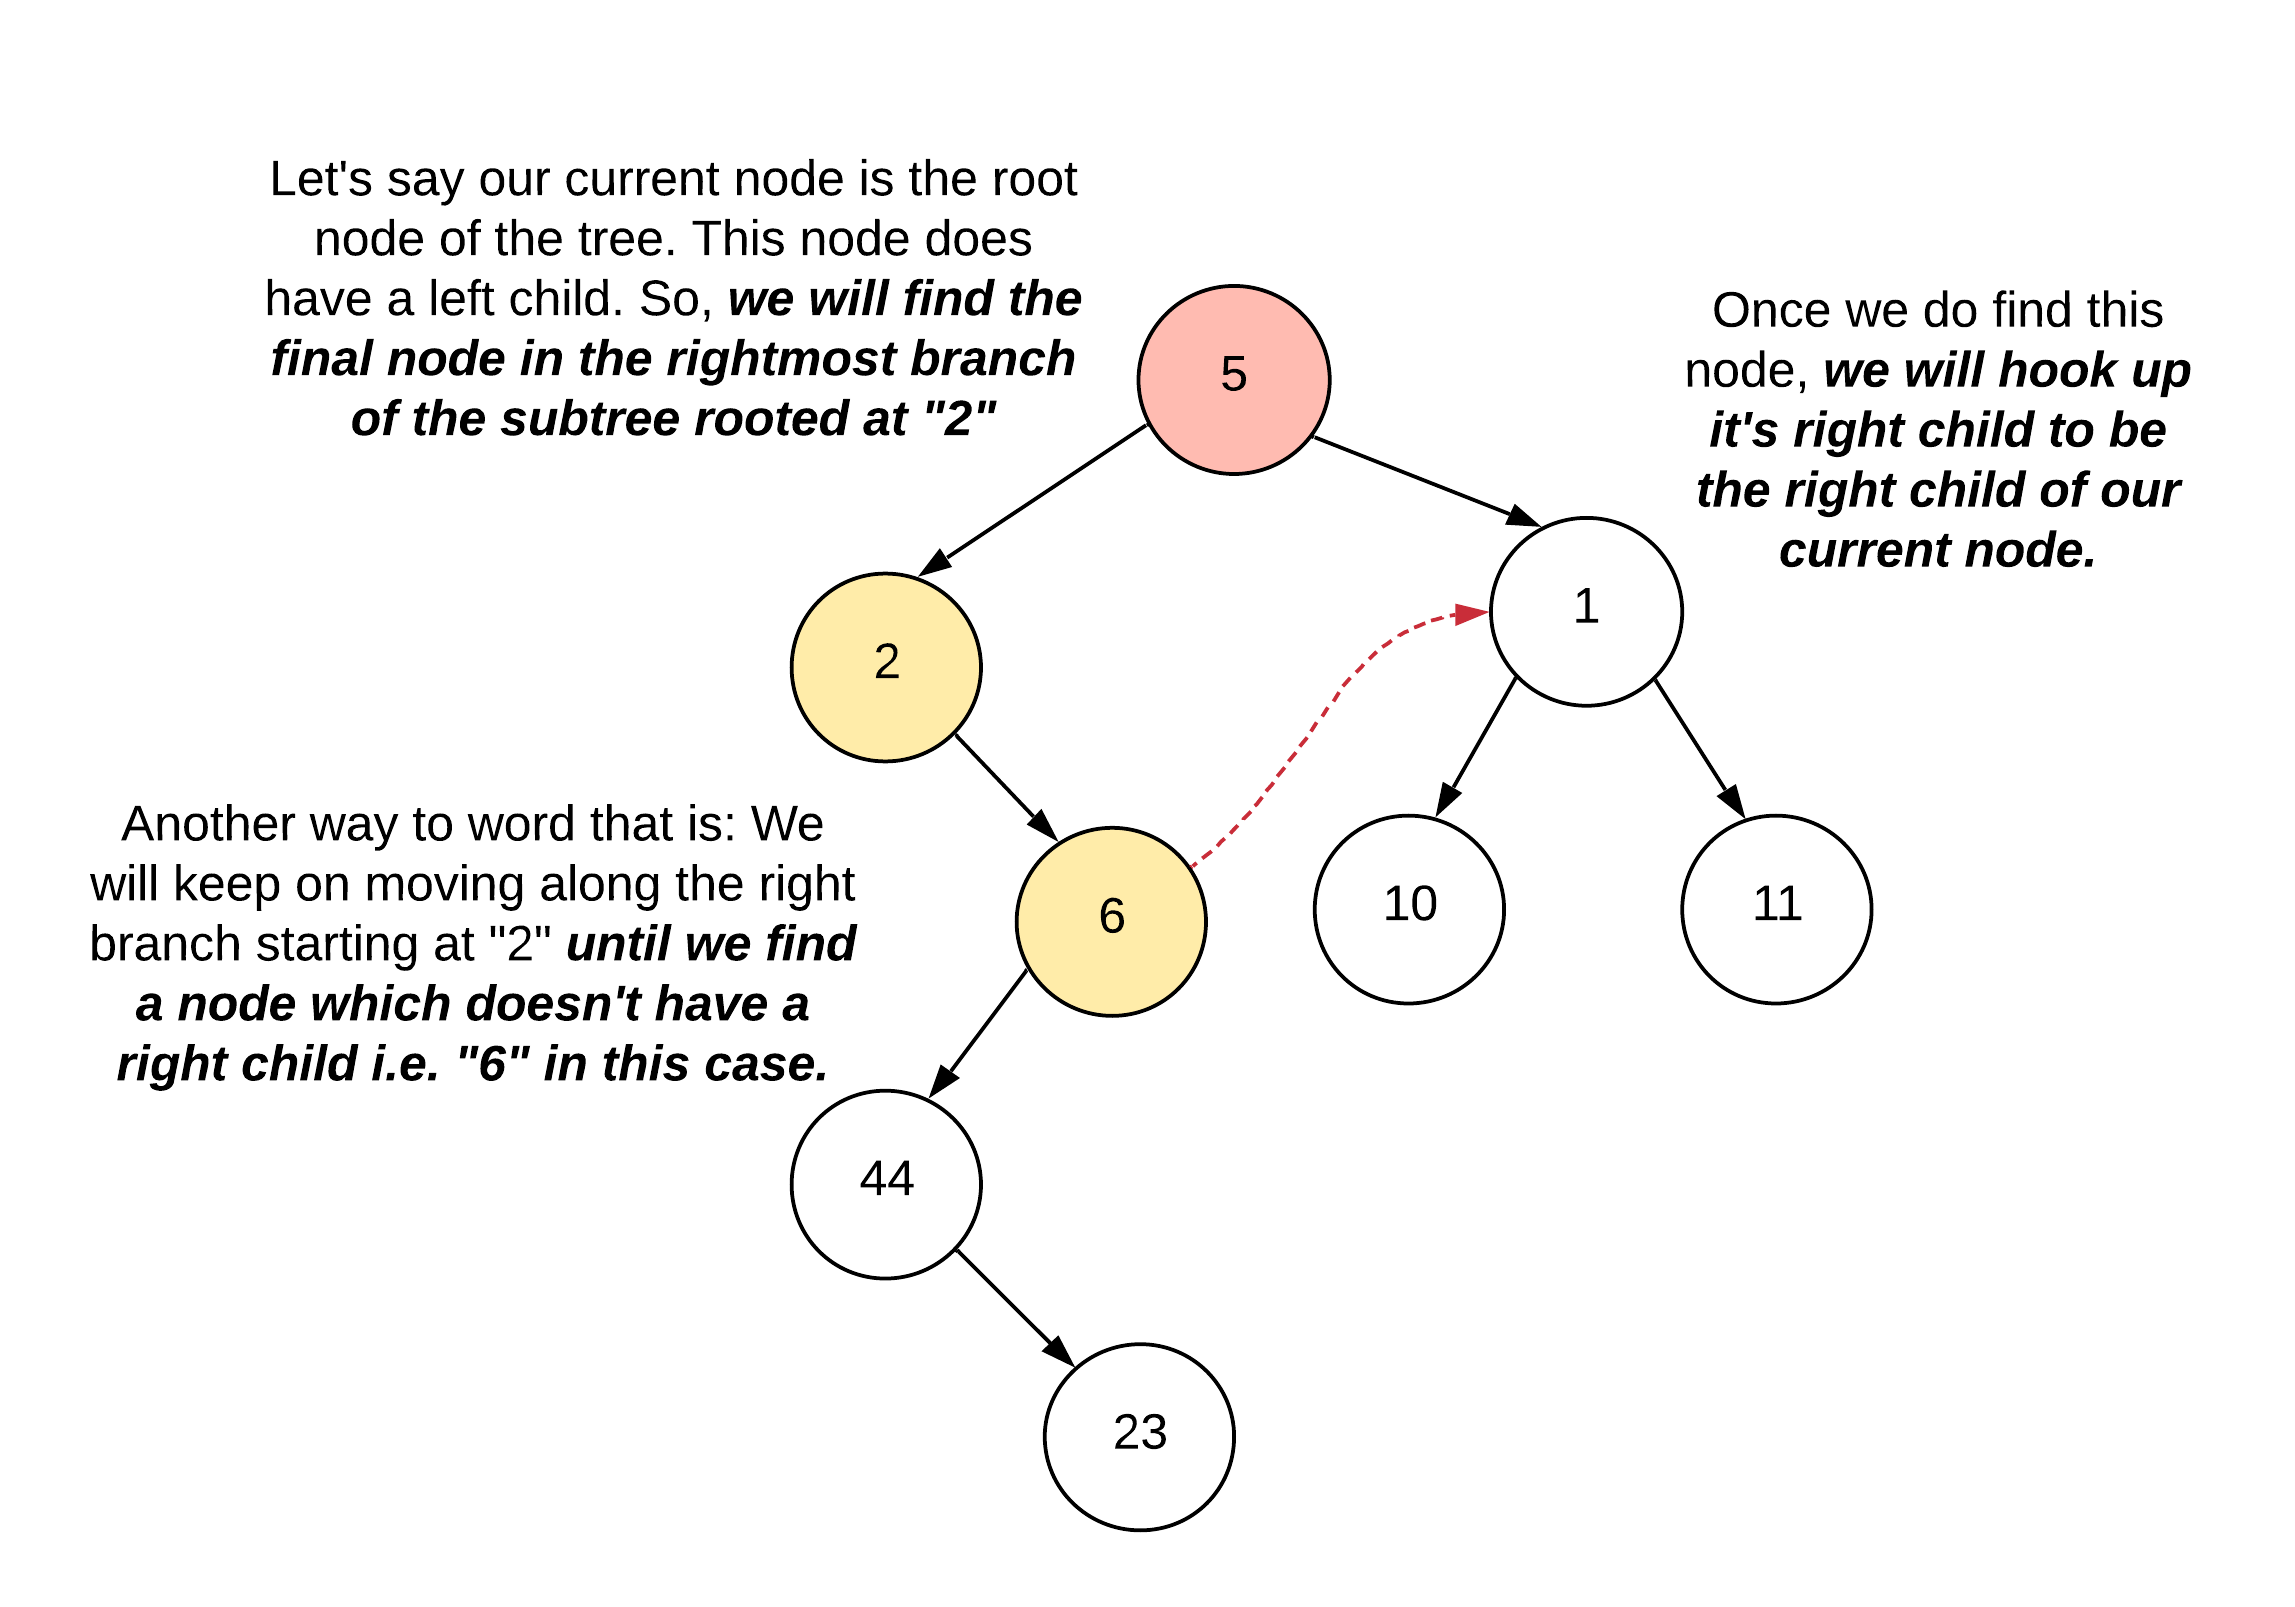

In [48]:
Image(filename="flatten3.png",height=600,width=600)

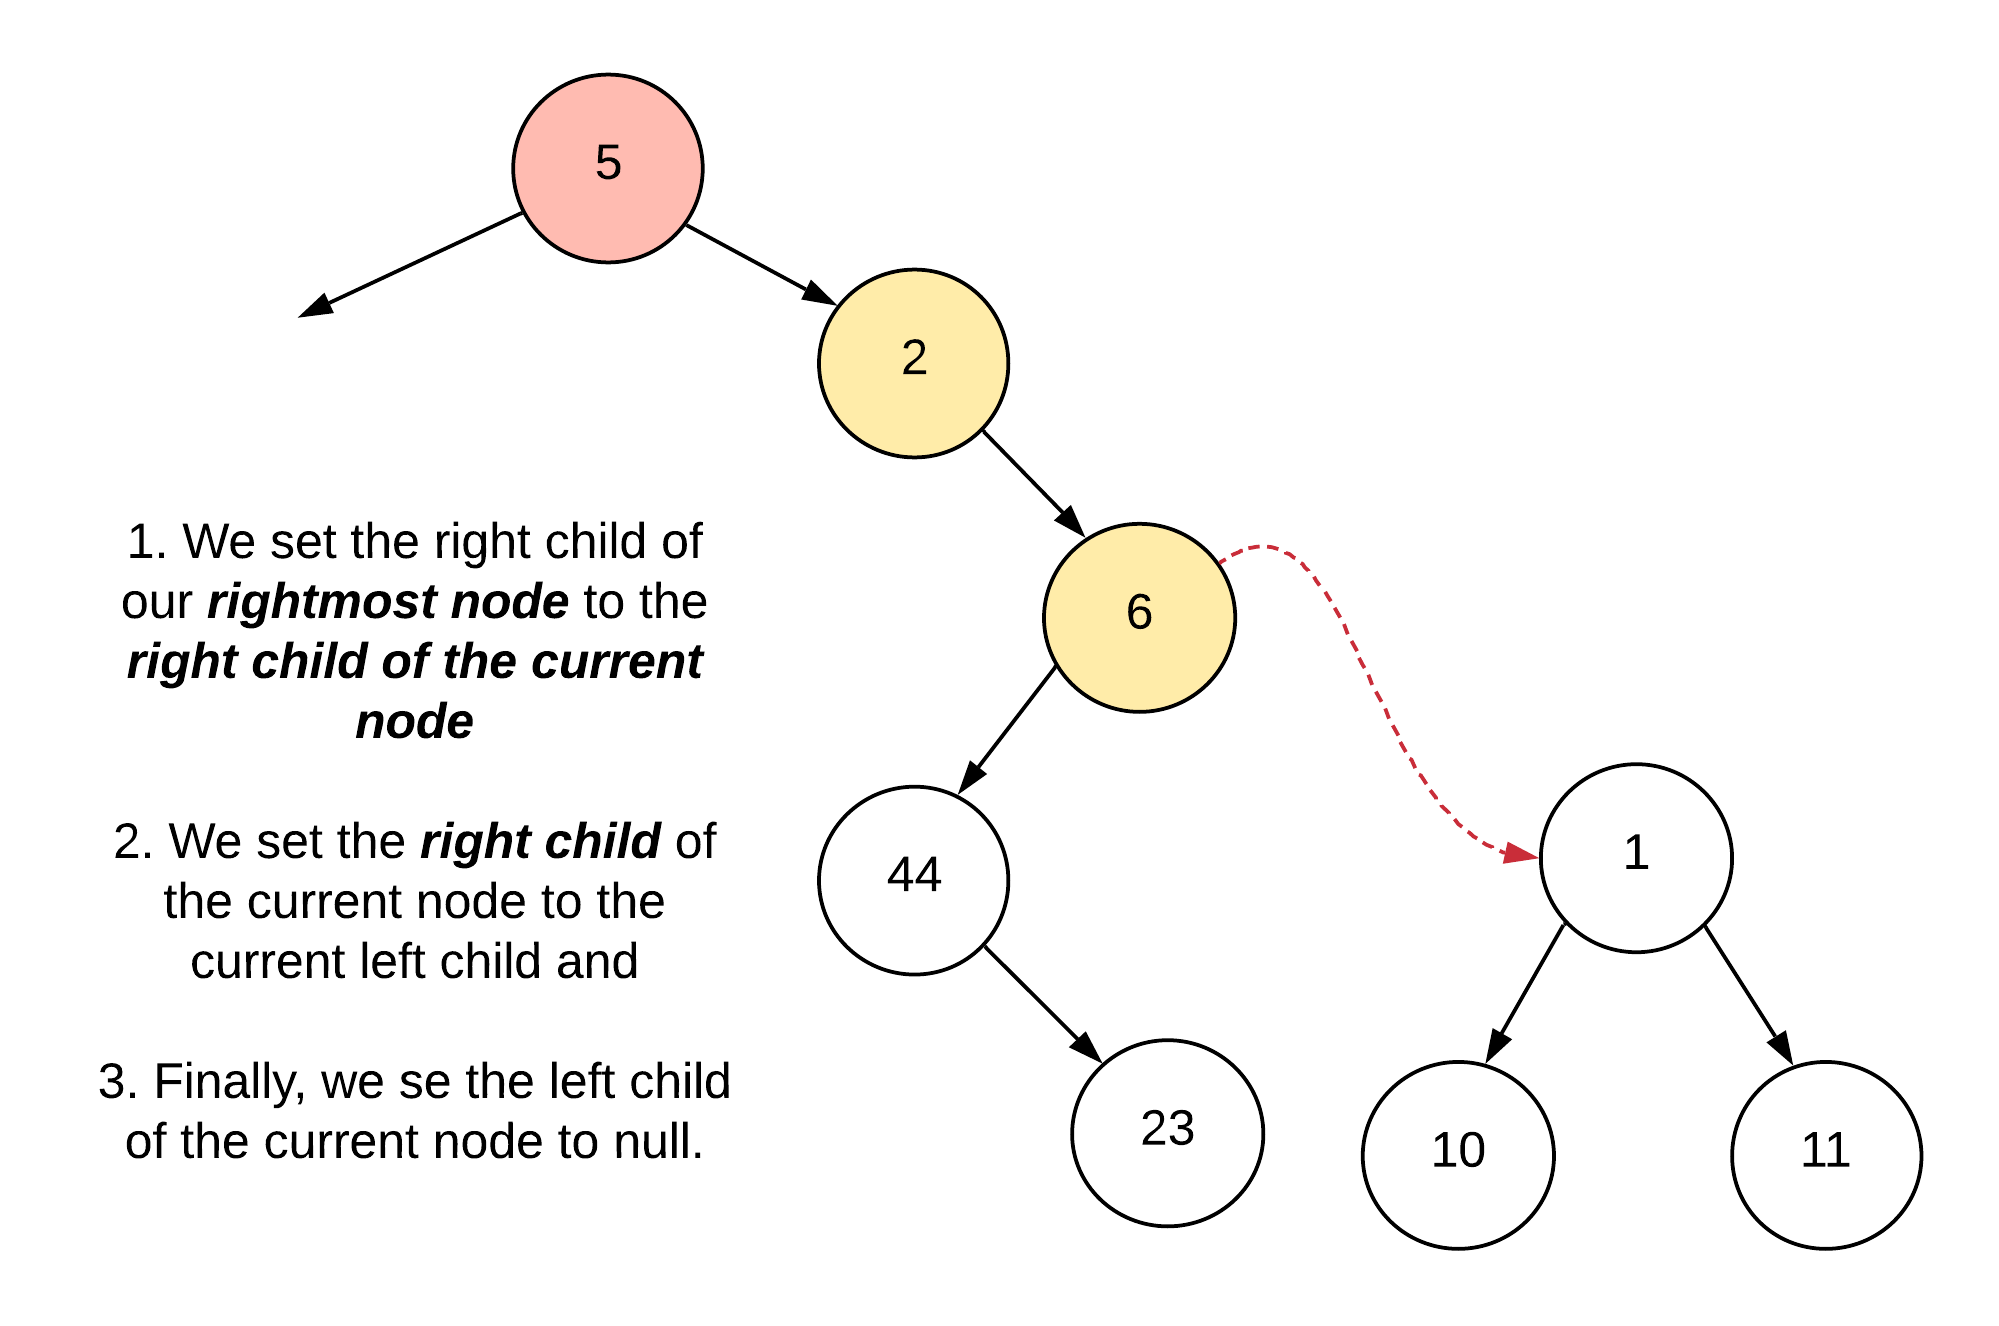

In [50]:
Image(filename="flatten4.png",height=600,width=600)

Processing of the node 2 is simple since it doesn't have a left child at all. So we have nothing to do here. Let's come over to the node 6 since this is where things get interesting and start to make sense. We'll again use the same logic as before. The rightmost is 23 here.

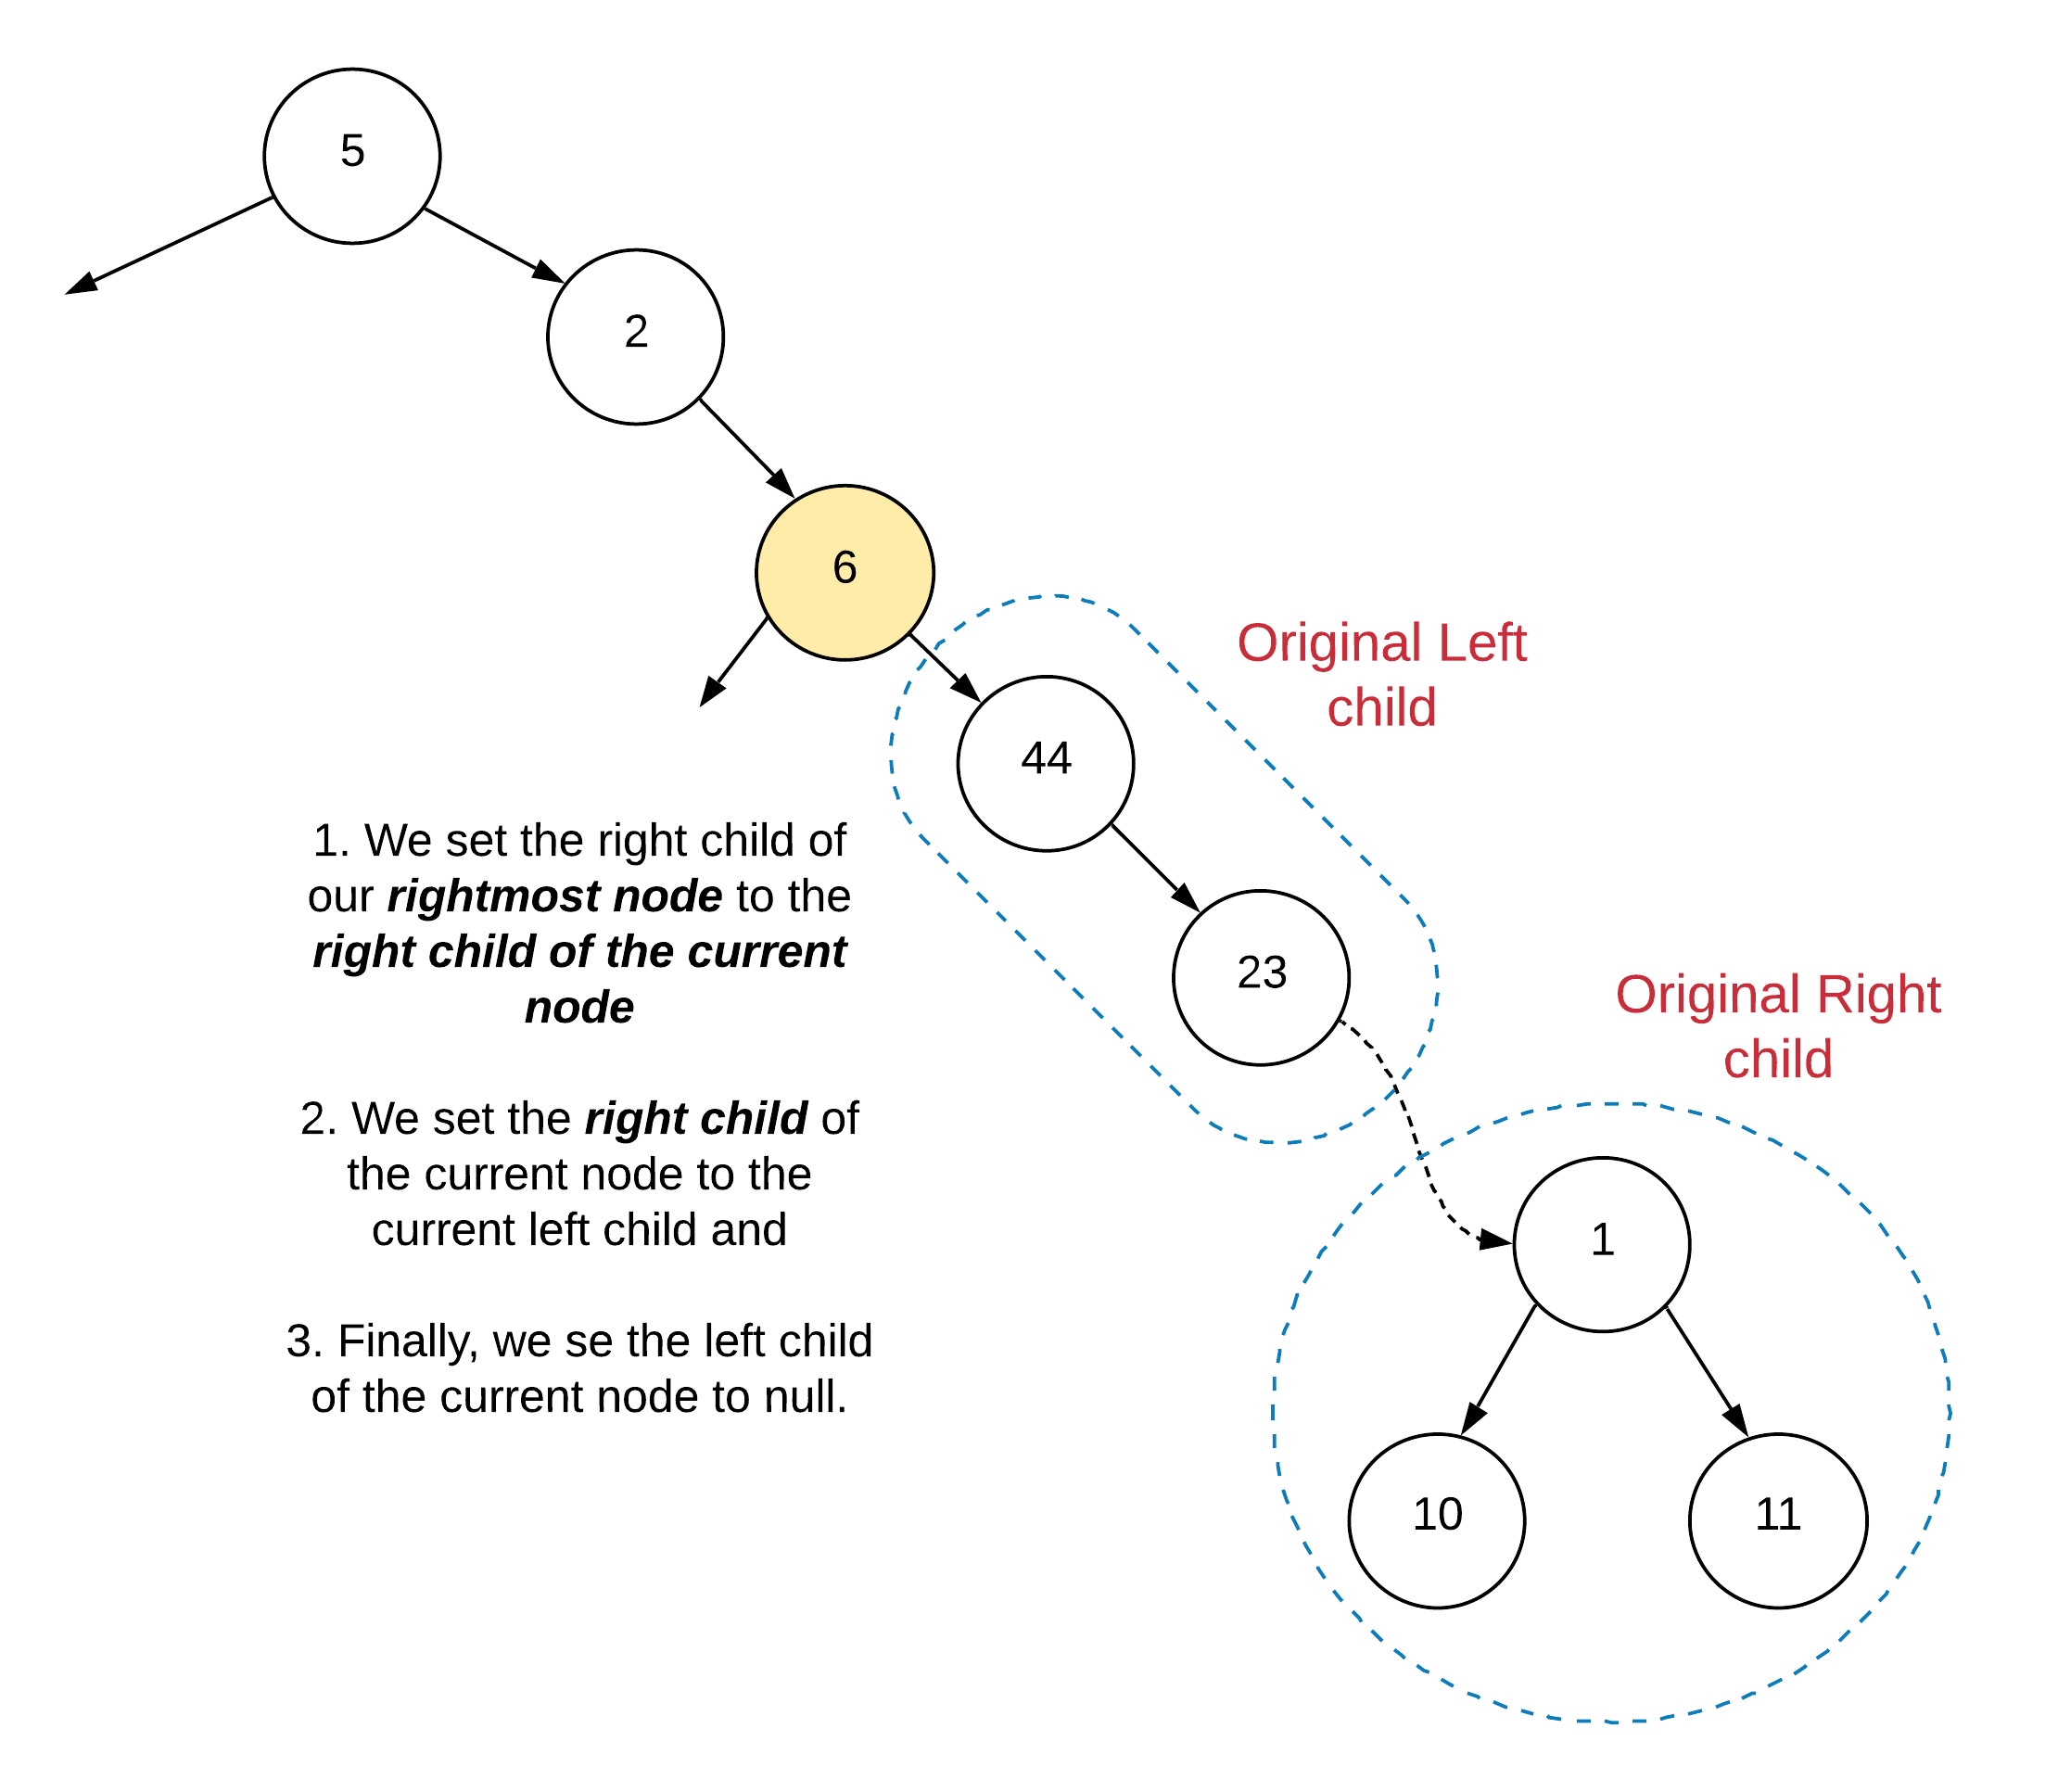

In [51]:
Image(filename="flatten5.png",height=600,width=600)

In [ ]:
class Solution:
    def flatten(self, root: TreeNode) -> None:      
        if not root:
            return None
        node = root
        while node:
            if node.left:                
                # Find the rightmost node
                rightmost = node.left
                while rightmost.right:
                    rightmost = rightmost.right
                # rewire the connections
                rightmost.right = node.right
                node.right = node.left
                node.left = None          
            # move on to the right side of the tree
            node = node.right

In [54]:
import numpy as np
np.arange(1, 1.3, 0.1)


array([1. , 1.1, 1.2, 1.3])

In [55]:
np.arange(1, 1.31, 0.1)

array([1. , 1.1, 1.2, 1.3])

<h1>Binary Tree Maximum Path Sum</h1>

post order traversal 左右根

Consider a scenario where the path with the highest sum passes through the tree's root.

There could be four possibilities.

(1)The path starts at the root and goes down through the root's left child. We don't know how long the path is, but it could extend to the bottom of the left subtree.
(2)The path starts at the root and goes down through the root's right child. Very similar to the previous case, but the direction is toward the right.
(3)The path involves both the left and the right child.
(4)The path doesn't involve any child. The root itself is the only element of the path with maximum sum.

This means we must first determine the gain in the path sum contributed by the left and the right subtree. Once we have both, we decide whether to include their contribution. We can see that we need to process the children before we process a node. This indicates that we need to perform a post-order traversal of the tree because, in post-order, children are processed before the parent.

To implement post-order traversal, we implement a recursive function. This function takes the root of the subtree as the input. The function returns the path sum gain contributed by the subtree. To calculate the path sum gain, the function calls itself recursively on the subtree's left and right child.

We have considered the scenario where the maximum sum path passes through the root. But what if it doesn't?

In [ ]:
class Solution:
    def max_path_sum(self, root: Optional[TreeNode]) -> int:
        max_path = -float('inf')
        # post order traversal of subtree rooted at `node`
        def gain_from_subtree(node: Optional[TreeNode]) -> int:
            nonlocal max_path
            if not node:
                return 0
            # add the gain from the left subtree. Note that if the
            # gain is negative, we can ignore it, or count it as 0.
            # This is the reason we use `max` here.
            gain_from_left = max(gain_from_subtree(node.left), 0)

            # add the gain / path sum from right subtree. 0 if negative
            gain_from_right = max(gain_from_subtree(node.right), 0)

            # if left or right gain are negative, they are counted
            # as 0, so this statement takes care of all four scenarios
            max_path = max(max_path, gain_from_left + gain_from_right + node.val)

            # return the max sum for a path starting at the root of subtree
            return max(
                gain_from_left + node.val,
                gain_from_right + node.val
            )

        gain_from_subtree(root)
        return max_path

<p style="color: red;">遇见tree几乎就是recursion,recursion function几乎一定take node as input, as it is structured that way</p>

<h1>Lowest Common Ancestor</h1>

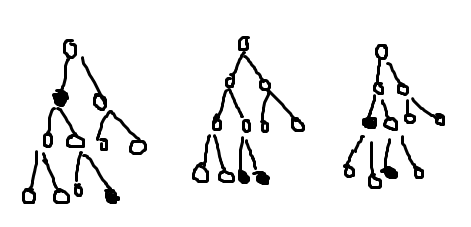

In [14]:
from IPython.display import Image
Image(filename="common_ancestor.png",height=400,width=400)

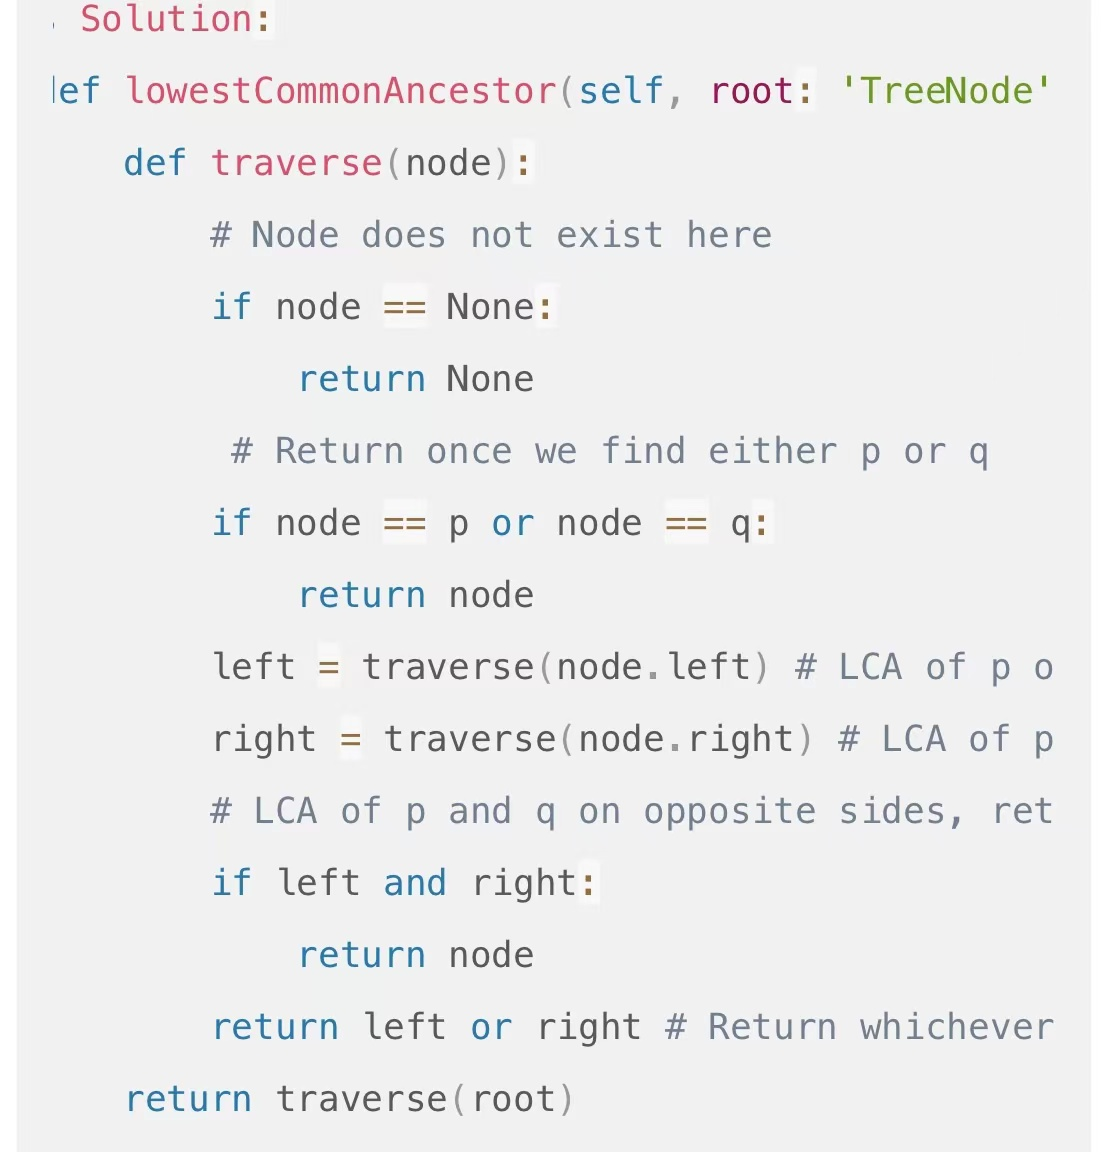

In [12]:
Image(filename="common_ancestor_code.jpg",height=350,width=350)

left = traverse(node.left) 不等于 traverse(node.left)。前面的情况里层函数虽然return了，但外层不return，仅仅是把return的值赋给left了。写recursion时要想清楚用哪个

<h1>Path Sum3</h1>

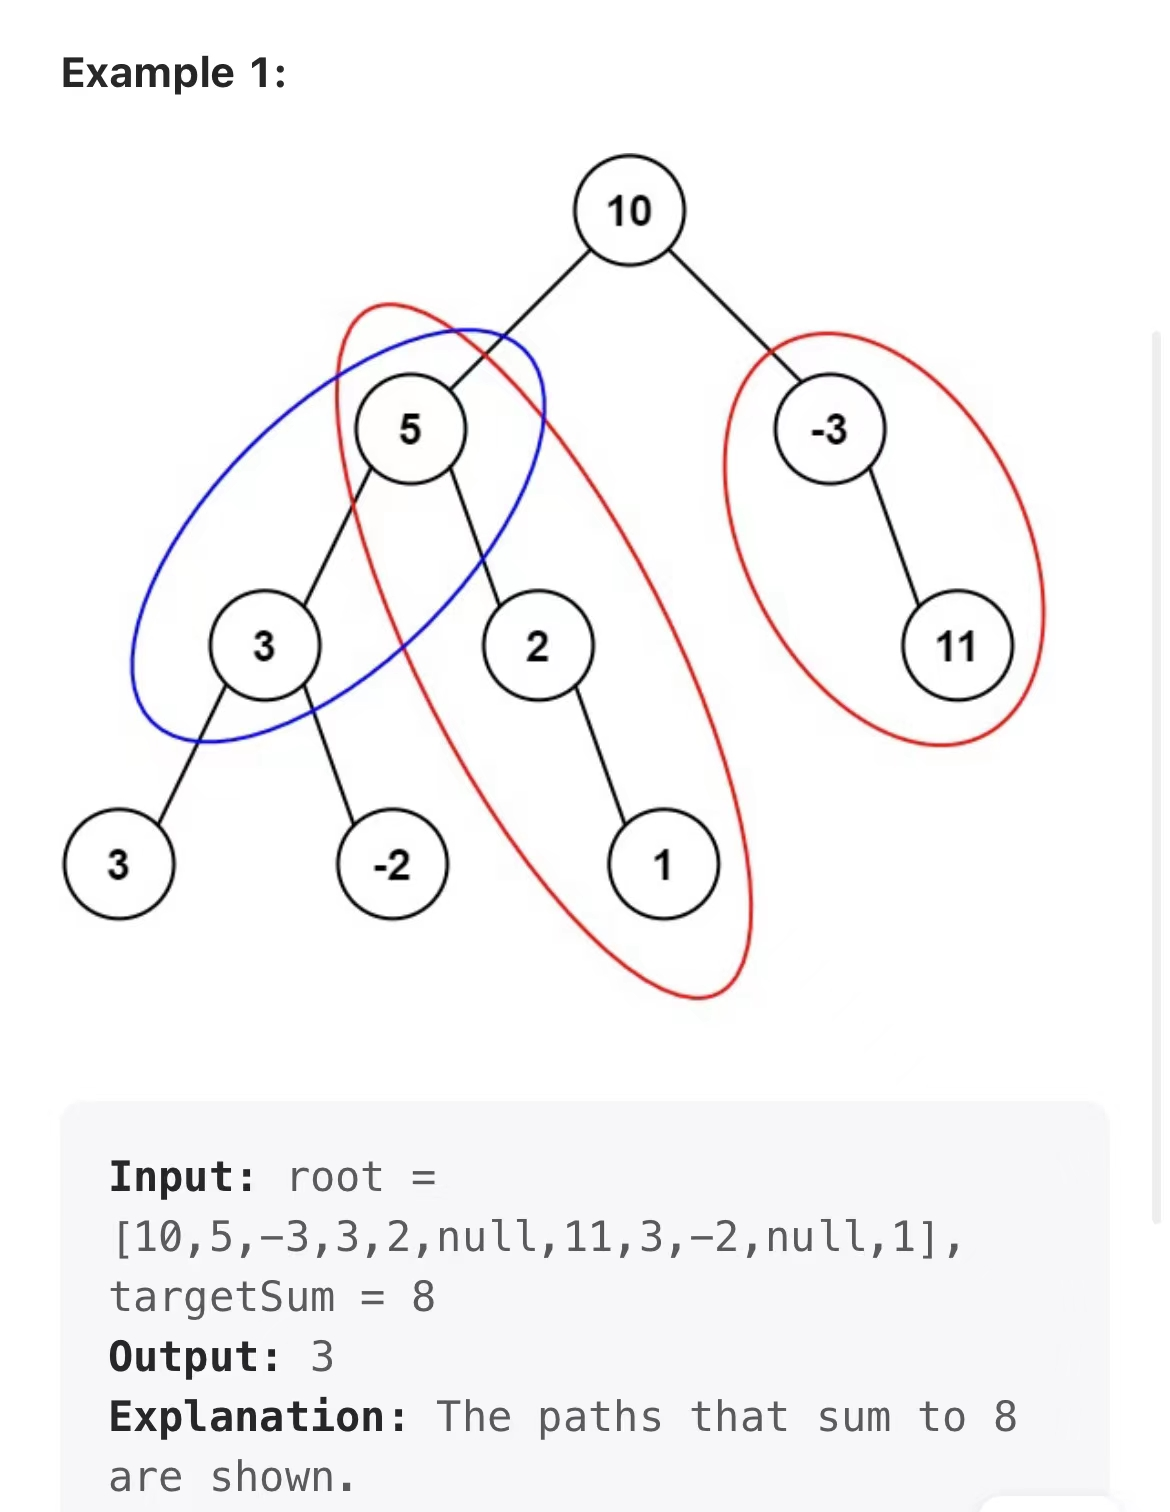

In [10]:
Image(filename="path_sum3.jpg",height=300,width=300)

In [ ]:
class Solution:
    def pathSum(self, root: Optional[TreeNode], k: int) -> int:
        def take(root, s):
            if not root:
                return 0
            res = 0
            if root.val == s: res += 1
            # take(5,3)函数里：res=0+take(3)+take(2)=2
            res += take(root.left, s - root.val) + take(root.right, s - root.val)
            return res
        
        if not root:
            return 0
        return self.pathSum(root.left, k) + self.pathSum(root.right, k) + take(root, k)

take表示一定take这个node。注意不带可以转换为必须带，注意这个思路的框架

<h1>Diameter of Binary Tree</h1>

find the longest path (every edge =1)

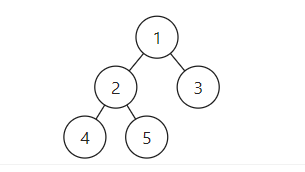

In [16]:
Image(filename="diameter.png",height=300,width=300)

In [ ]:
class Solution:
    def diameterOfBinaryTree(self, root: TreeNode) -> int:
        diameter = 0

        def longest_path(node):
            if not node:
                return 0
            nonlocal diameter
            left_path = longest_path(node.left)
            right_path = longest_path(node.right)
            
            #这步很关键，意味着如果左右都要，这种情况是不用往上走的
            diameter = max(diameter, left_path + right_path)
            #return的和global不一样
            return max(left_path, right_path) + 1

        longest_path(root)
        return diameter

In [ ]:
对于longest(4): diameter=0, return 1
对于longest(2): diameter=2, return 2
对于Longest(1): diameter=3, return 3

<p style="color: red;">为什么return和global不一样：精髓在于return的是recursion的output,是要传递的，因此要传递就意味着不能左右都选，所以return的是max(left_path, right_path)。而global变量是最终的值，是可以左右都选的，也就是说是一个不用传递的、最终的值。这样就自动区分了两边都选和可选一边<p>

In [ ]:
#错误代码：
def diameterOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        def take(node,pre=False): #must take the node
            res=0
            if not node:
                res=0
            elif node.left==None and node.right==None:
                res= 0
            elif node.left==None and node.right!=None:
                res=res+1+take(node.right, True)
            elif node.right==None and node.left!=None:
                res=res+1+take(node.left, True)
            else:  #left and right all have tree
                if pre==False:
                    res=res+2+take(node.left, True)+take(node.right, True)
                else:
                    res= res+1 +max(take(node.left, True), take(node.right, True))     
            return res
        
        return max(take(root), take(root.left), take(root.right))